In [1]:
import polars as pl
import polars.selectors as cs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pl.read_csv('../../DATA/iris.csv')

In [5]:
df

sepal_length,sepal_width,petal_length,petal_width,species
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""setosa"""
4.9,3.0,1.4,0.2,"""setosa"""
4.7,3.2,1.3,0.2,"""setosa"""
4.6,3.1,1.5,0.2,"""setosa"""
5.0,3.6,1.4,0.2,"""setosa"""
…,…,…,…,…
6.7,3.0,5.2,2.3,"""virginica"""
6.3,2.5,5.0,1.9,"""virginica"""
6.5,3.0,5.2,2.0,"""virginica"""


In [7]:
df.describe()

statistic,sepal_length,sepal_width,petal_length,petal_width,species
str,f64,f64,f64,f64,str
"""count""",150.0,150.0,150.0,150.0,"""150"""
"""null_count""",0.0,0.0,0.0,0.0,"""0"""
"""mean""",5.843333,3.054,3.758667,1.198667,null
"""std""",0.828066,0.433594,1.76442,0.763161,null
"""min""",4.3,2.0,1.0,0.1,"""setosa"""
"""25%""",5.1,2.8,1.6,0.3,null
"""50%""",5.8,3.0,4.4,1.3,null
"""75%""",6.4,3.3,5.1,1.8,null
"""max""",7.9,4.4,6.9,2.5,"""virginica"""


In [8]:
df['species'].value_counts()

species,count
str,u32
"""setosa""",50
"""versicolor""",50
"""virginica""",50


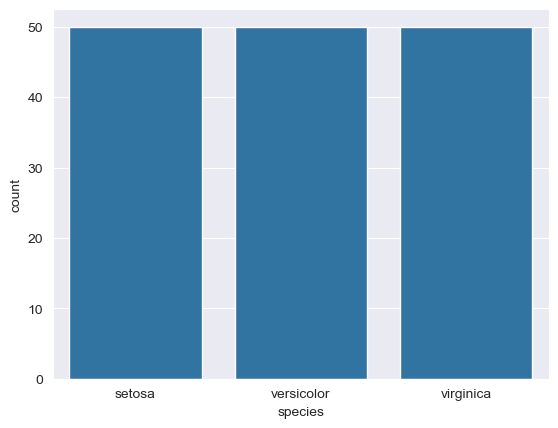

In [11]:
sns.countplot(data=df, x='species')
plt.show()

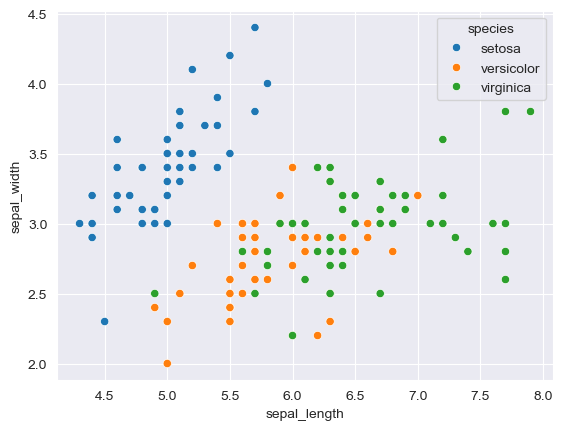

In [13]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.show()

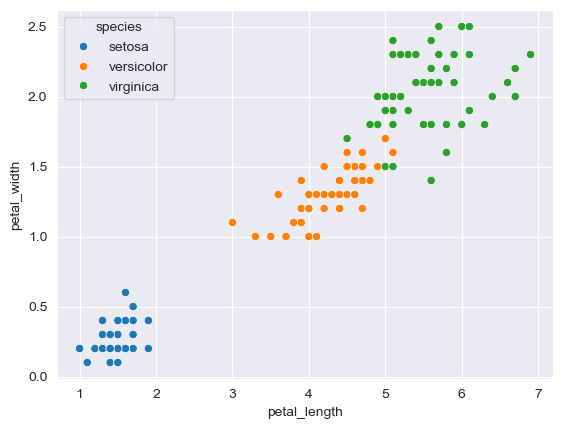

In [15]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.show()

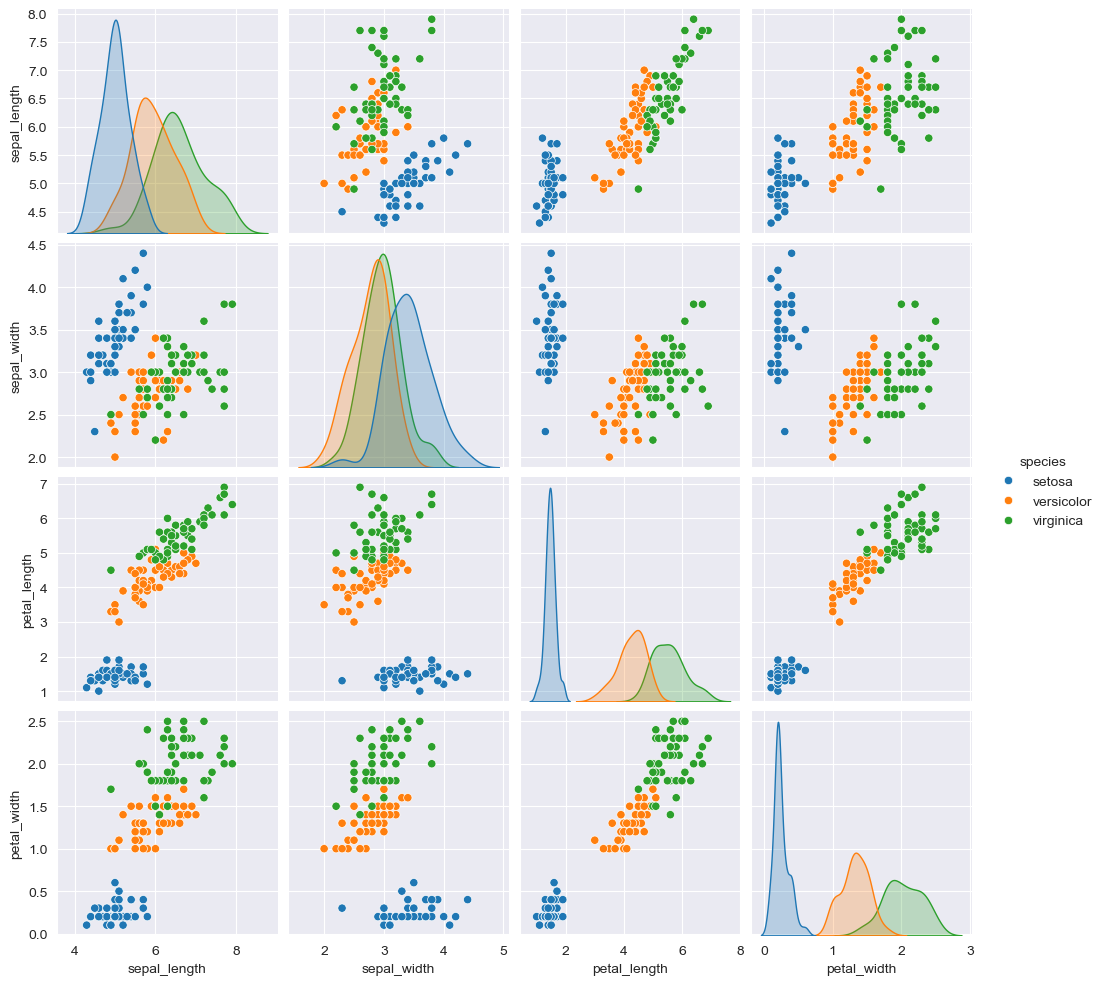

In [18]:
sns.pairplot(df.to_pandas(), hue='species')
plt.show()

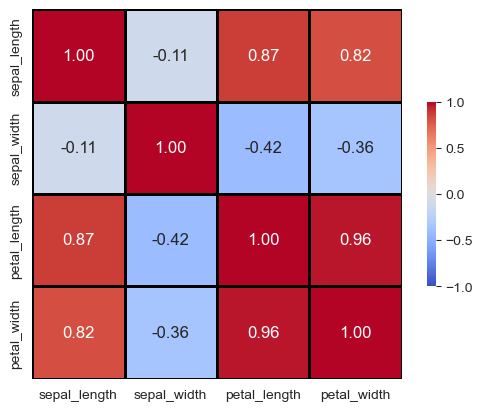

In [31]:
sns.heatmap(
    df.select(cs.numeric()).corr().to_pandas(),  # Convert to Pandas for Heatmap
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=1.0,
    linecolor='black',
    square=True,
    cbar_kws={'shrink': 0.5},
    annot_kws={'size': 12},
    xticklabels=df.select(cs.numeric()).columns,
    yticklabels=df.select(cs.numeric()).columns,
    cbar=True,
    vmin=-1,
    vmax=1,
    center=0
)
plt.show()

In [35]:
fig = px.scatter_3d(
    df,
    x='sepal_length',
    y='sepal_width',
    z='petal_length',
    color='species',
    title='Iris Dataset 3D Scatter Plot',
    width=1000,
    height=1000
)
fig.show()

In [36]:
X = df.select(cs.exclude(['species']))
y = df['species']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
scaled_X_train = scaler.fit_transform(X_train)

In [44]:
scaled_X_test = scaler.transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
from sklearn.model_selection import GridSearchCV

In [71]:
log_model = LogisticRegression(
    solver='lbfgs',
    max_iter=5000,
    n_jobs=-1,
)

In [72]:
penalty = ['l1', 'l2']

In [73]:
C = np.logspace(0, 4, 10)

In [74]:
grid_model = GridSearchCV(
    estimator=log_model,
    n_jobs=-1,
    param_grid={'C':C, 'penalty': penalty},
    verbose=2,
)

In [75]:
grid_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\li

GridSearchCV(estimator=LogisticRegression(max_iter=5000, n_jobs=-1), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             verbose=2)

In [76]:
grid_model.best_params_

{'C': 59.94842503189409, 'penalty': 'l2'}

In [77]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [78]:
y_pred = grid_model.predict(scaled_X_test)

In [104]:
accuracy_score(y_test, y_pred)

1.0

In [105]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 11]], dtype=int64)

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



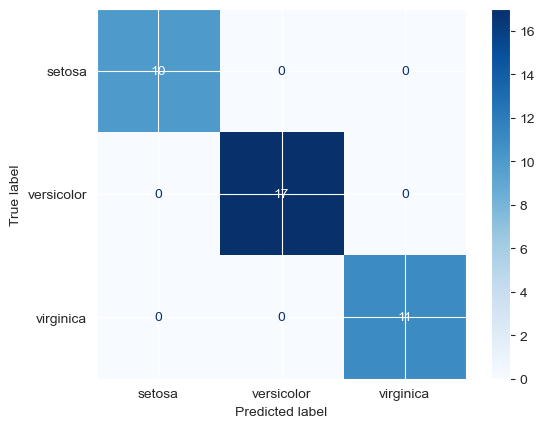

In [109]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', display_labels=df['species'].unique(), )